## 다항 회귀(Polynomial Regression)

데이터가 비선형의 형태를 갖고 있을 때, 각 변수의 거듭제곱을 변수로 추가하여 훈련시키는 기법 

In [1]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
cereal = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/cereal.csv')
cereal = cereal.iloc[:, 3:]
cereal.loc[cereal['sugars'] > 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


### 설명 변수 1개 다항 회귀

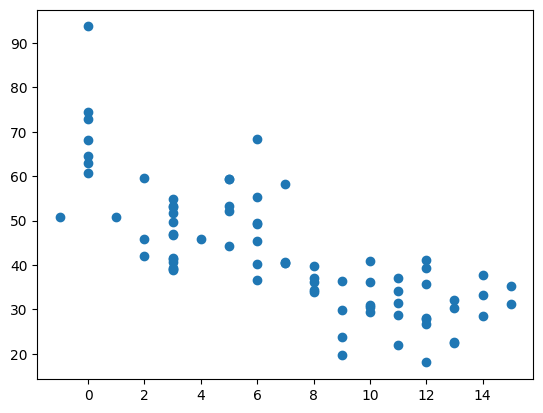

In [26]:
# 설탕함유량과 영양등급간의 관계 파악 (산점도)
x = cereal['sugars']
y = cereal['rating']
plt.scatter(x, y);

In [29]:
# 훈련, 검증 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=4, test_size=.3)
x_train.shape

(53,)

* 다항 변수 추가

    ```sklearn.preprocessing.PolynomialFeatures```

In [30]:
# 다항변수 추가
poly_reg = PolynomialFeatures(degree=2) # 2차항으로 설정
x_poly = poly_reg.fit_transform(x_train.values.reshape(-1,1))
# 모델 학습
reg = LinearRegression()
reg.fit(x_poly, y_train) 
# 검증데이터 변환
x_test_poly = poly_reg.transform(x_test.values.reshape(-1,1))
y_pred_t = reg.predict(x_test_poly)
# 성능 평가
mse = mean_squared_error(y_test, y_pred_t)
mae = mean_absolute_error(y_test, y_pred_t)
rmse = np.sqrt(mse) # mse 의 제곱근
acc = reg.score(x_test_poly, y_test)
print(f'''
      MSE: {mse}
      MAE: {mae}
      RMSE: {rmse}
      ACC: {acc*100}%''')



      MSE: 48.95934431447879
      MAE: 5.007826351506901
      RMSE: 6.9970954198494955
      ACC: 76.52502134347127%


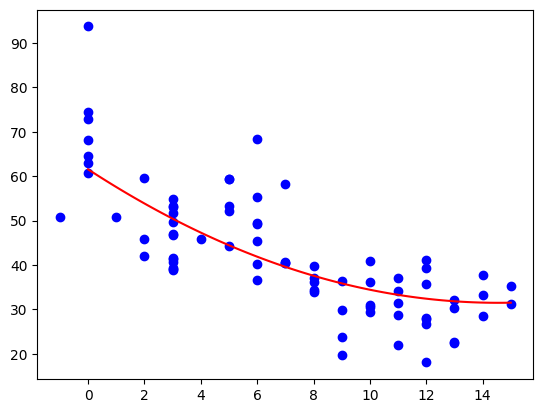

In [35]:
# 산점도 위에 다항 회귀선 그리기
## 선으로 그려질 수 있도록 numpy라이브러리 활용, 무수히 많은 일정한 간격의 array 생성
x_new = np.linspace(0, 15, 100).reshape(100,1) # 설탕 함유량(0-15)
x_new_poly = poly_reg.transform(x_new)
y_pred_n = reg.predict(x_new_poly) # 해당 값들로 예측

# 기존 산점도
plt.scatter(x,y, color='b', label='Actual')
plt.plot(x_new, y_pred_n, color='r', label='Prediction')

### 설명 변수 12개 고차 다항 회귀

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calories  77 non-null     int64  
 1   protein   77 non-null     int64  
 2   fat       77 non-null     int64  
 3   sodium    77 non-null     int64  
 4   fiber     77 non-null     float64
 5   carbo     77 non-null     float64
 6   sugars    77 non-null     int64  
 7   potass    77 non-null     int64  
 8   vitamins  77 non-null     int64  
 9   shelf     77 non-null     int64  
 10  weight    77 non-null     float64
 11  cups      77 non-null     float64
 12  rating    77 non-null     float64
dtypes: float64(5), int64(8)
memory usage: 7.9 KB


In [ ]:
x = cereal.iloc[:, :-1].values # 모든 변수 포함
y = cereal['rating'].values
# 학습, 검증 데이터
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=4)
# 표준화 후 다항 변수 변환
# 모델 학습
# 검증 데이터 변환
# 예측
# 성능 평가
